In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [16]:
% matplotlib inline

In [17]:
cnsmr_cmplnts = pd.read_csv("complaints_dec_2014.csv")

In [18]:
cnsmr_cmplnts.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


In [20]:
temp = pd.DatetimeIndex(cnsmr_cmplnts['Date received'])
cnsmr_cmplnts["weekdays"] = temp.weekday
received = cnsmr_cmplnts.pop('Date received')
cnsmr_cmplnts.index = pd.to_datetime(received)

In [33]:
cnsmr_cmplnts.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,weekdays
Date received,,,,,,,,,,,,,,
2014-12-31,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN,2
2014-12-31,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN,2
2014-12-31,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN,2
2014-12-31,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN,2
2014-12-31,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN,2


In [25]:
products = cnsmr_cmplnts.groupby("Product").count().sort("Complaint ID", ascending = False)
products = products.T

In [36]:
products

Product,Mortgage,Debt collection,Credit reporting,Bank account or service,Credit card,Consumer loan,Student loan,Payday loan,Money transfers,Prepaid card,Other financial service
Complaint ID,3002,2942,2113,1136,1100,578,340,141,107,70,14
Sub-product,3002,2160,0,1136,0,578,340,0,107,70,14
Issue,3002,2942,2113,1136,1100,578,340,141,107,70,14
Sub-issue,0,2942,2113,0,0,0,0,0,0,0,0
State,2970,2910,2022,1112,1091,575,335,139,102,67,14
ZIP code,2962,2911,2090,1117,1086,576,338,140,106,69,14
Submitted via,3002,2942,2113,1136,1100,578,340,141,107,70,14
Date sent to company,3002,2942,2113,1136,1100,578,340,141,107,70,14
Company,3002,2942,2113,1136,1100,578,340,141,107,70,14
Company response,3002,2942,2113,1136,1100,578,340,141,107,70,14


In [37]:
companies = cnsmr_cmplnts.groupby("Company").count().sort("Complaint ID", ascending = False).head(10)
companies = companies.T

In [39]:
company_responses = cnsmr_cmplnts.groupby("Company response").count().sort("Complaint ID", ascending = False)
company_responses = company_responses.T

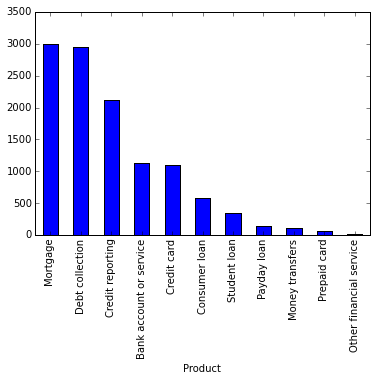

In [49]:
plt.figure();

products.ix[0].plot(kind='bar', sort_columns=True); plt.axhline(0, color='k');